In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


# Read & Clean Data

In [27]:
df=pd.read_csv('/kaggle/input/student-performance-prediction/student_performance_dataset.csv')

In [29]:
df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


In [30]:
df.tail()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
703,S492,Male,14,84.658761,78,PhD,Yes,No,50,Fail
704,S301,Male,35,60.278990,83,Masters,No,No,62,Pass
705,S473,Male,25,98.384969,75,Bachelors,Yes,No,57,Fail
706,S307,Female,21,96.148012,84,Bachelors,Yes,No,65,Pass
707,S046,Female,22,80.404392,93,Bachelors,Yes,No,55,Fail


In [31]:
df.shape

(708, 10)

In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB


we do not have null value in all coulmn

In [33]:
df.describe()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
count,708.000000,708.000000,708.000000,708.000000
mean,26.132768,78.107722,77.871469,58.771186
std,8.877727,13.802802,14.402739,6.705877
min,10.000000,50.116970,50.000000,50.000000
25%,19.000000,67.550094,65.000000,52.000000
50%,27.000000,79.363046,79.000000,59.500000
75%,34.000000,89.504232,91.000000,64.000000
max,39.000000,99.967675,100.000000,77.000000


In [34]:
df.duplicated().sum()


208

In [35]:
df=df.drop_duplicates()

In [36]:
df.duplicated().sum()


0

# Visulaization

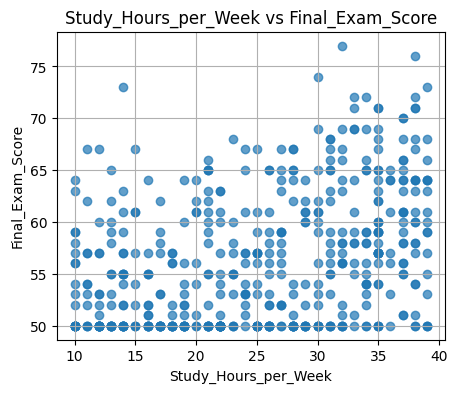

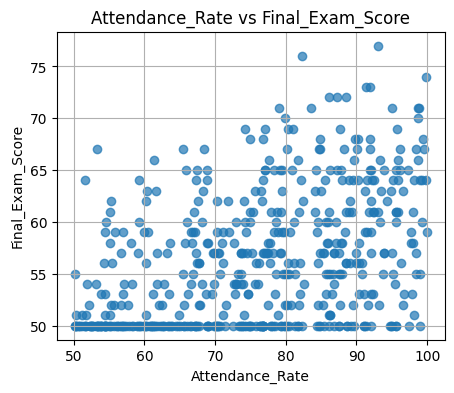

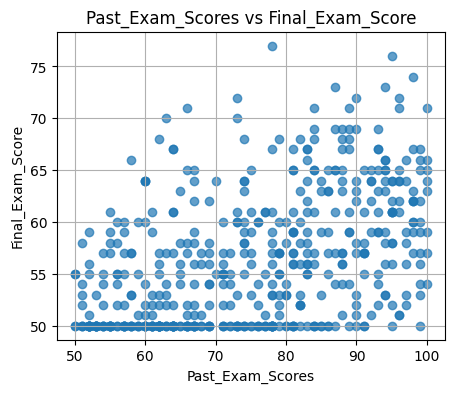

In [37]:
target = "Final_Exam_Score"

# ------------------
# Numerical Features vs Target
# ------------------
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=[target]).columns

for col in numeric_cols:
    plt.figure(figsize=(5,4))
    plt.scatter(df[col], df[target], alpha=0.7)
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f"{col} vs {target}")
    plt.grid(True)
    plt.show()


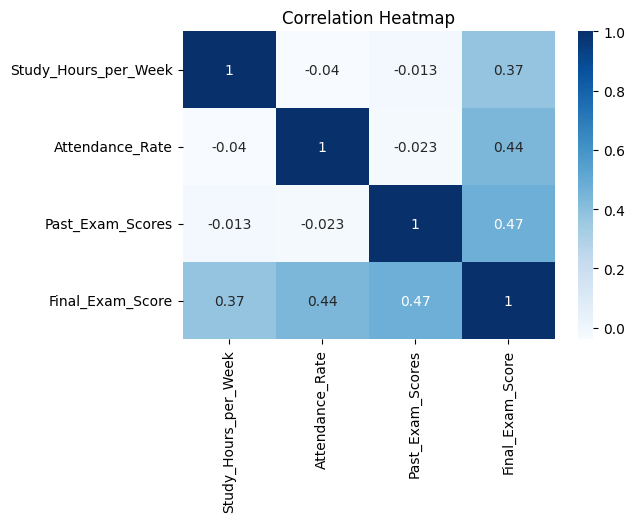

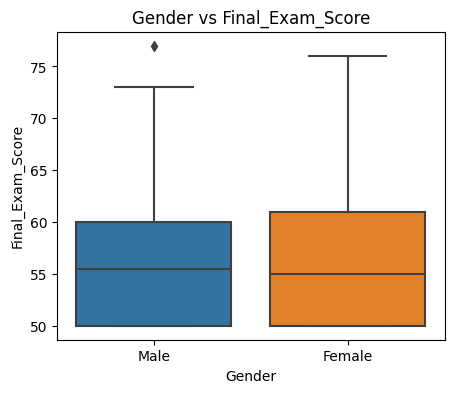

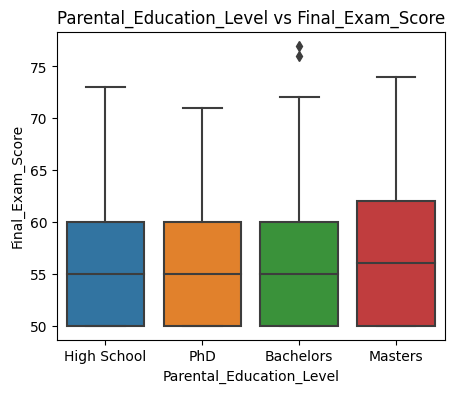

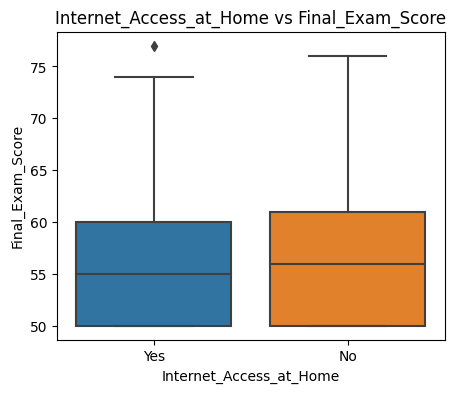

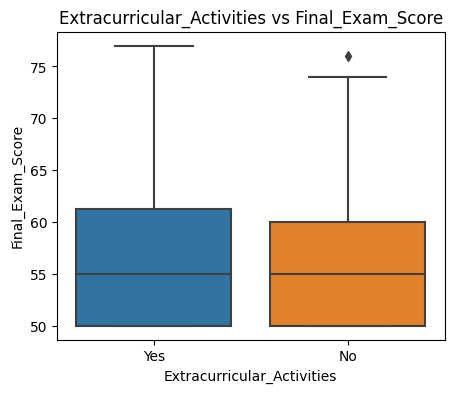

In [38]:
target = "Final_Exam_Score"

# ------------------
# Correlation Heatmap (Numerical features + Target)
# ------------------
plt.figure(figsize=(6,4))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

# ------------------
# Boxplots for Categorical vs Target
# ------------------
categorical_cols = df.select_dtypes(include=['object']).drop(columns=["Student_ID", "Pass_Fail"]).columns

for col in categorical_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(x=df[col], y=df[target])
    plt.title(f"{col} vs {target}")
    plt.show()


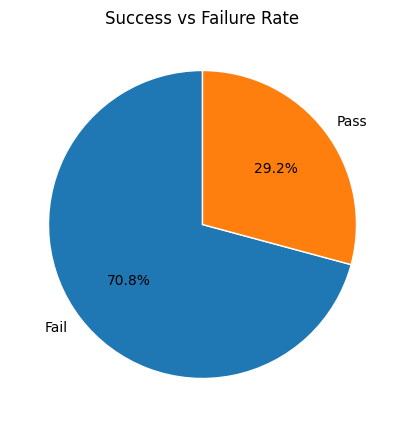

In [39]:
pass_fail_counts = df["Pass_Fail"].value_counts(normalize=True) * 100

plt.figure(figsize=(5,5))
plt.pie(pass_fail_counts, 
        labels=pass_fail_counts.index, 
        autopct="%.1f%%", 
        startangle=90, 
        wedgeprops={'edgecolor':'white'})
plt.title("Success vs Failure Rate")
plt.show()


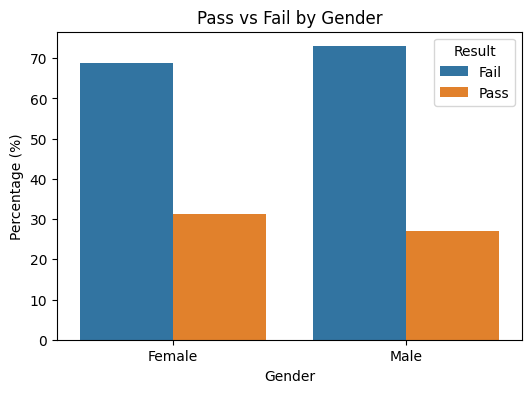

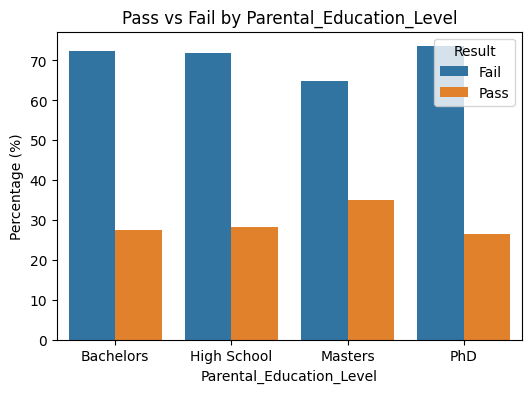

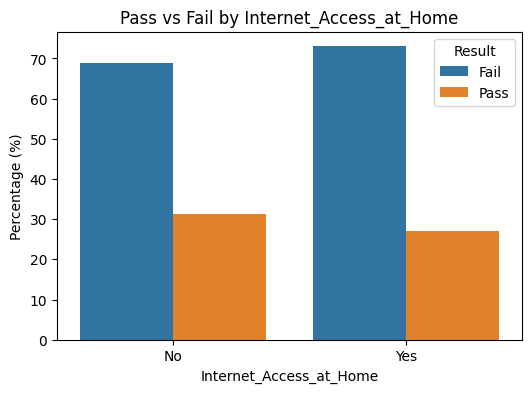

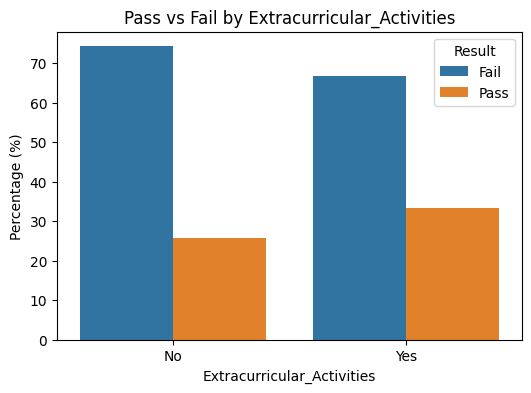

In [46]:
categorical_cols = df.select_dtypes(include=['object', 'category']).drop(columns=["Student_ID",'Pass_Fail']).columns

for col in categorical_cols:
    plt.figure(figsize=(6,4))

    counts = df.groupby([col, "Pass_Fail"], as_index=False).size()
    counts.rename(columns={"size": "count"}, inplace=True)
    counts["percent"] = counts.groupby(col)["count"].transform(lambda x: 100 * x / x.sum())

    sns.barplot(data=counts, x=col, y="percent", hue="Pass_Fail")
    
    plt.title(f"Pass vs Fail by {col}")
    plt.ylabel("Percentage (%)")
    plt.xlabel(col)
    plt.legend(title="Result")
    plt.show()


In [48]:
df_encoded = df.copy()

categorical_cols = df_encoded.select_dtypes(include=['object', 'category']).drop(columns=["Student_ID"]).columns

le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

print("Done ✅")
df_encoded.head()


Done ✅


,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,1,31,68.267841,86,1,1,1,63,1
1,S136,1,16,78.222927,73,3,0,0,50,0
2,S209,0,21,87.525096,74,3,1,0,55,0
3,S458,0,27,92.076483,99,0,0,0,65,1
4,S078,0,37,98.655517,63,2,0,1,70,1


In [55]:
X = df_encoded.drop('Final_Exam_Score', axis=1)
y = df_encoded['Final_Exam_Score']

In [56]:
X = df_encoded.drop('Student_ID', axis=1)

# Split Data

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
X_train

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
294,1,33,95.775684,89,2,1,0,69,1
582,1,12,93.175907,66,3,0,0,52,0
19,0,39,85.197307,62,3,1,0,57,0
402,1,25,95.028615,65,2,1,1,50,0
417,0,28,58.336538,51,0,0,0,50,0
...,...,...,...,...,...,...,...,...,...
113,1,33,91.339941,53,3,0,0,50,0
323,0,39,76.829532,62,2,1,1,68,1
442,0,31,74.908259,89,3,1,0,68,1
588,1,38,55.145802,97,1,1,1,58,0


In [59]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Linearregression Model

In [68]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [76]:
train_score1 = model1.score(X_train, y_train)
test_score1 = model1.score(X_test, y_test)


In [74]:
train_mse1 = mean_squared_error(y_train, model1.predict(X_train))
test_mse1 = mean_squared_error(y_test, model1.predict(X_test))

In [75]:
print("Train R² Score:", train_score1)
print("Test R² Score:", test_score1)
print("Train MSE:", train_mse1)
print("Test MSE:", test_mse1)

Train R² Score: 1.0
Test R² Score: 1.0
Train MSE: 2.3224065049706589e-29
Test MSE: 3.2311742677852644e-29


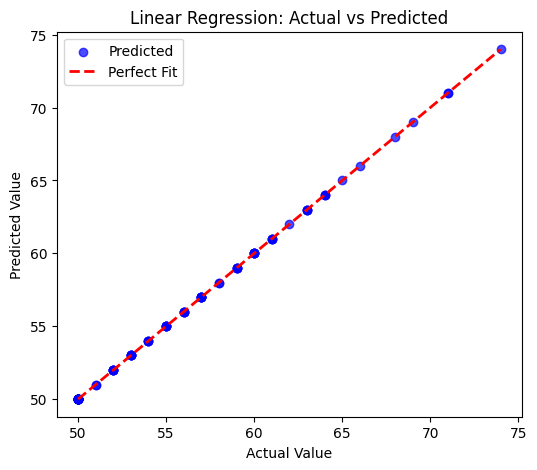

In [78]:
y_pred1 = model1.predict(X_test)   

plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred1, alpha=0.7, color="blue", label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2, label="Perfect Fit")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

# Randomforst Model

In [77]:
model2 = RandomForestRegressor(random_state=42)
model2.fit(X_train, y_train)
train_score2 = model.score(X_train, y_train)
test_score2 = model.score(X_test, y_test)
train_mse2 = mean_squared_error(y_train, model2.predict(X_train))
test_mse2 = mean_squared_error(y_test, model2.predict(X_test))

print("Train R² Score:", train_score2)
print("Test R² Score:", test_score2)
print("Train MSE:", train_mse2)
print("Test MSE:", test_mse2)

Train R² Score: 0.9998512966449707
Test R² Score: 0.9992552818391806
Train MSE: 0.006028500000000072
Test MSE: 0.024631999999999793


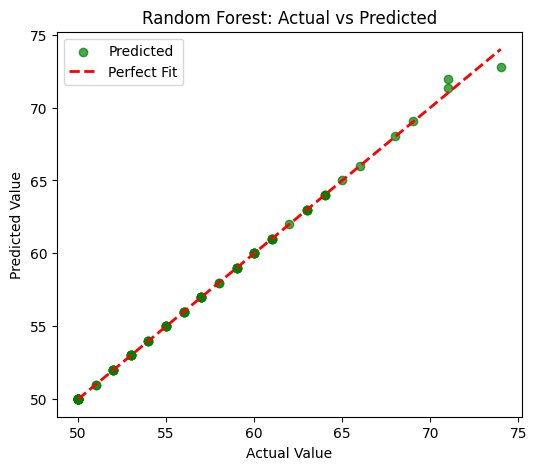

In [79]:
y_pred2 = model2.predict(X_test)   

plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred2, alpha=0.7, color="green", label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2, label="Perfect Fit")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Random Forest: Actual vs Predicted")
plt.legend()
plt.show()
